In [490]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


In [491]:
df = pd.read_csv("CellDNA.csv", header= None)


In [492]:
df.columns =['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12','x13']

In [493]:
df.loc[:, 'x13'] = np.where(df.x13>0, 1, 0)

In [494]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,216,738.527778,216.449074,38.229761,9.556174,0.968254,12.847813,216,1,16.583719,0.640950,0.397059,98.589,0
1213,328,748.896341,47.664634,63.138991,9.101974,0.989555,57.919494,328,1,20.435816,0.607407,0.205257,131.431,1
1214,97,761.690722,207.288660,22.751513,8.230351,0.932275,-24.674618,97,1,11.113246,0.591463,0.384921,67.427,0
1215,223,770.654708,235.502242,53.491654,8.643053,0.986860,73.244715,223,1,16.850294,0.557500,0.252834,112.656,0


In [495]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']] = scaler.fit_transform(df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']])

In [496]:
numeric_cols = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[ 0.15952762, -1.80200559, -1.20813407, ...,  0.34511514,
         0.65289142, -0.00691284],
       [-0.93921222, -1.80987674,  0.42436331, ...,  0.7072868 ,
         0.84374979, -0.81411281],
       [ 0.41024678, -1.67379037,  0.55538528, ..., -0.19189804,
         0.55503945,  0.20875597],
       ...,
       [-0.76223399,  1.58818067, -0.02859014, ..., -1.56321582,
        -0.56778731, -0.23578419],
       [ 0.16690172,  1.62978166,  0.17075035, ..., -1.85164337,
        -1.40231699,  0.69144818],
       [-0.83597492,  1.60332534,  0.38379311, ...,  1.53291195,
         1.69830929, -0.95601961]])

In [497]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.159528,-1.802006,-1.208134,0.114420,-0.135689,0.538311,-1.587426,0.135833,0.233292,0.329626,0.345115,0.652891,-0.006913,0
1,-0.939212,-1.809877,0.424363,-0.933511,-0.817247,0.019258,1.500586,-0.909580,0.233292,-1.221986,0.707287,0.843750,-0.814113,0
2,0.410247,-1.673790,0.555385,0.200447,0.134019,0.501621,1.684134,0.374384,0.233292,0.598252,-0.191898,0.555039,0.208756,0
3,-0.548385,-1.617137,1.879947,-1.059096,0.939523,-6.206504,1.253012,-0.537722,0.233292,-0.567479,0.896626,1.082702,-0.719501,0
4,0.181650,-1.525316,2.335905,0.578476,-0.417798,0.681969,-1.048779,0.156881,0.233292,0.354121,-0.402387,-1.404271,0.228457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.115283,1.480684,0.036132,0.252878,0.049329,0.537678,0.250896,0.093736,0.233292,0.280134,-1.142965,-0.491097,0.403063,0
1213,0.941181,1.528803,-1.156399,1.554010,-0.075675,0.729753,1.142193,0.879550,0.233292,1.113556,-1.427815,-1.702917,1.076351,1
1214,-0.762234,1.588181,-0.028590,-0.555628,-0.315562,0.213238,-0.491114,-0.741192,0.233292,-0.903431,-1.563216,-0.567787,-0.235784,0
1215,0.166902,1.629782,0.170750,1.050082,-0.201979,0.705453,1.445251,0.142849,0.233292,0.337809,-1.851643,-1.402317,0.691448,0


In [498]:
x = df.drop('x13', axis = 1).values
y = df['x13']
y = y.astype(int)

print(x.shape)
print(y.shape)

(1217, 13)
(1217,)


In [499]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)


In [503]:
reg = Lasso(alpha=0.5)
reg.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [504]:
print('Lasso Regression: R^2 score on training set', reg.score(x_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(x_test, y_test)*100)

Lasso Regression: R^2 score on training set 0.0
Lasso Regression: R^2 score on test set -0.39948214876439625


In [505]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = x.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [506]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(x_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(x_train, y_train)
    test_r_squared[ind] = reg.score(x_test, y_test)

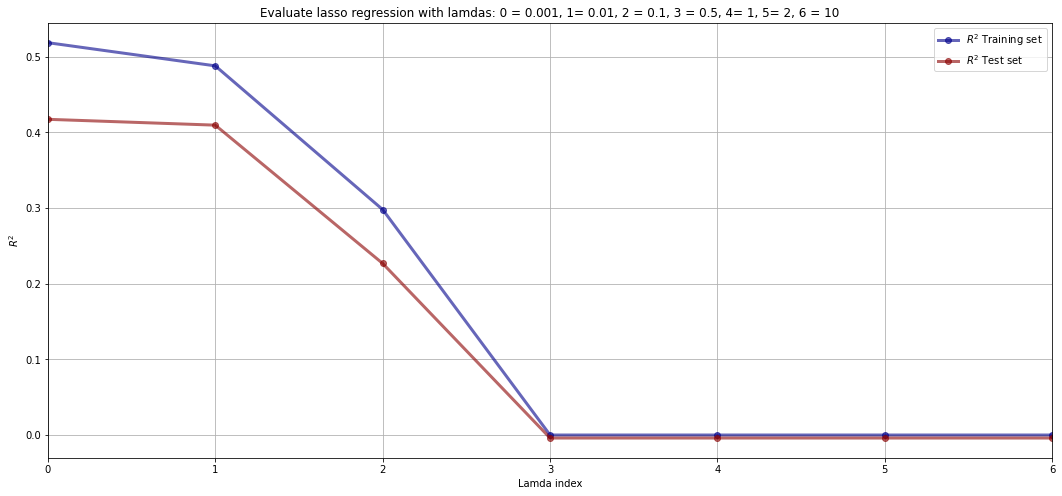

In [507]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [508]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    41.741223
lambda        0.001000
Name: 0, dtype: float64

In [509]:
reg_best = Lasso(alpha = 0.1)
reg_best.fit(x_train, y_train)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [510]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(x_test))
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
pred_num = x.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [511]:
for ind, i in enumerate(lambdas):
  reg = Lasso(alpha = i)
  reg.fit(x_train, y_train)
  results = cross_val_score(reg, x, y, cv=10, scoring="r2")
  train_r_squared[ind] = reg.score(x_train, y_train)
  test_r_squared[ind] = reg.score(x_test, y_test)

In [469]:
# Generate and dataset for Logistic Regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

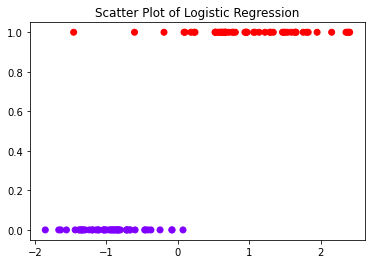

In [470]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

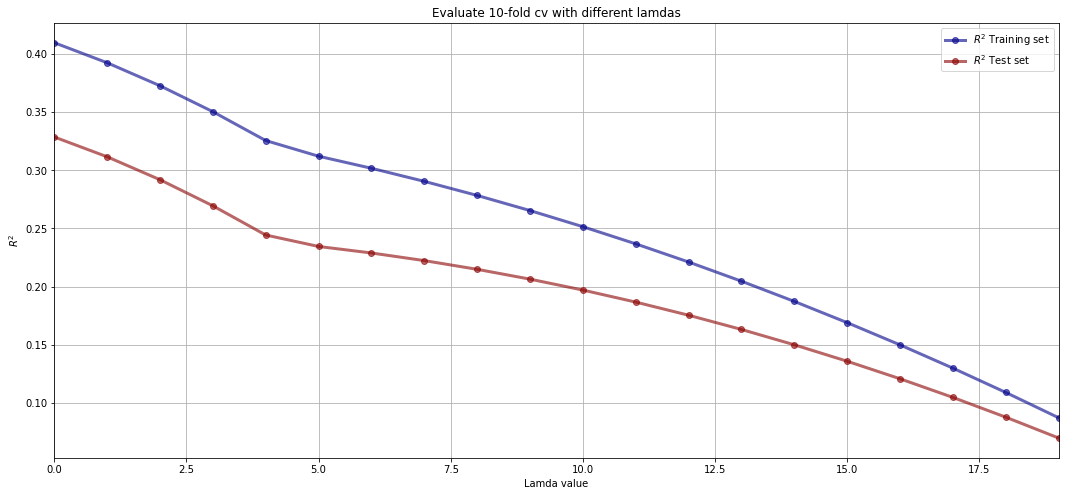

In [512]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 10-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()


In [515]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [516]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [517]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [518]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.1119313   0.00544534 -0.11908434  1.95024794 -3.09050253  1.64511823
  -0.15444238 -0.14349965  0.44362345  0.7913768   0.09720706 -0.11849826
   0.43719503]]
[-4.57712126]


In [519]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[245,   6],
       [ 15,  39]])

In [520]:
# True positive: 8 (upper-left) – Number of positives we predicted correctly
# True negative: 15(lower-right) – Number of negatives we predicted correctly
# False positive: 2 (top-right) – Number of positives we predicted wrongly
# False negative:  0(lower-left) – Number of negatives we predicted wrongly

5. Data Preprocessing

* 5.1 Exploratory Data Analysis



In [521]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [522]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-0.1119313 ,  0.00544534, -0.11908434,  1.95024794, -3.09050253,
         1.64511823, -0.15444238, -0.14349965,  0.44362345,  0.7913768 ,
         0.09720706, -0.11849826,  0.43719503]])

In [523]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.9155701754385965
The Testing Accuracy is:  0.9311475409836065
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       766
           1       0.79      0.64      0.71       146

    accuracy                           0.92       912
   macro avg       0.86      0.81      0.83       912
weighted avg       0.91      0.92      0.91       912



In [524]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

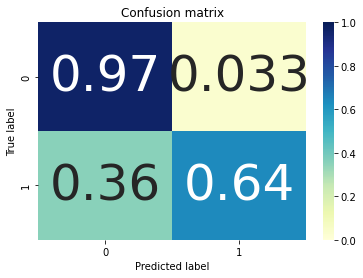

In [525]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [526]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    32.864342
lambda        0.050000
Name: 0, dtype: float64

In [527]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(x_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [528]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(x_test))

0.12032582864322522

In [529]:
reg_best.coef_

array([ 0.        ,  0.        , -0.        ,  0.07099064, -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ])

In [530]:
reg_best = Lasso(alpha = 0.1)
reg_best.fit(x_train, y_train)
reg_best.coef_

array([ 0.       ,  0.       , -0.       ,  0.1160288, -0.       ,
        0.       , -0.       ,  0.       ,  0.       ,  0.       ,
       -0.       , -0.       ,  0.       ])

ValueError: ignored

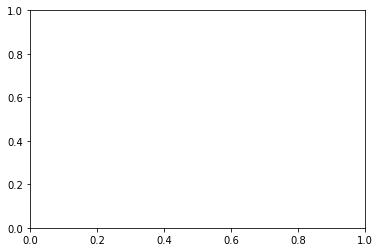

In [533]:
LogR = LogisticRegression()
LogR.fit(x,np.ravel(y.astype(int)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(x,LogR.predict_proba(x)[:,1])
plt.xlabel("Predictors")
plt.ylabel("Probability of interesting for the study")

In [532]:
clf_l1_LR = LogisticRegression(C = 1, penalty = 'l2')
clf_l1_LR.fit(x, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)